# NLP basics tutorial extended

In [6]:
import os

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger

from wordcloud import WordCloud

import spacy
from spacy import displacy
import es_core_news_md

from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"
os.environ["JAVAHOME"] = "/usr/bin/java"

In [8]:
nlp = es_core_news_md.load()

In [9]:
# Creating a connection to MongoDB
client = MongoClient("localhost", 27017)
db = client["news"]
collection = db["elespectador"]

In [10]:
text = []
for news in list(collection.find({}, {"title": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["full_text"])

In [11]:
text = " ".join(text)

In [12]:
# Sentence tokenization
sent_tokenize(text)[:10]

['Críticas y apoyo al Ejército: presidenciables sobre acción militar en Putumayo La investigación realizada de forma conjunta por tres medios de comunicación (El Espectador, Revista Cambio y Vorágine) sobre la acción militar en Putumayo el pasado 28 de marzo, ha generado todo tipo reacciones al evidenciar las irregularidades que habría cometido la Fuerza Pública por las que, en medio del operativo para dar con el paradero de “Bruno”, líder de una facción de la disidencia de las Farc denominada Comandos de la Frontera, murieron 11 personas entre las que había civiles y un menor de edad.',
 'Que los militares se identificaron como guerrilleros para atacar a un supuesto grupo de los Comandos de la Frontera, que llegaron vestidos de negro y luego se cambiaron a los habituales uniformes camuflados, y que los cuerpos de los asesinados fueron manipulados para ponerles armas, fueron solo algunas de las revelaciones de la triple publicación a la que reaccionaron la mayoría de candidatos preside

In [13]:
# Word tokenization
tokens = word_tokenize(text)
#Eliminamos los signos de puntuacion
words = [word for word in tokens if word.isalpha()]

In [14]:
words[:10]

['Críticas',
 'y',
 'apoyo',
 'al',
 'Ejército',
 'presidenciables',
 'sobre',
 'acción',
 'militar',
 'en']

In [15]:
# Words distribution
frec_dist = FreqDist(words)

In [16]:
# Printing the most common words
frec_dist.most_common(10)

[('de', 870),
 ('la', 482),
 ('que', 406),
 ('el', 370),
 ('en', 363),
 ('y', 303),
 ('a', 220),
 ('los', 188),
 ('las', 159),
 ('del', 143)]

In [17]:
# Stop words
# Stop words are basically a set of commonly used words in any language, not just English.
# The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

stop_words = set(stopwords.words("spanish"))

In [18]:
# Removing stop words
filtered_words = []

for w in words:
    if w.lower() not in stop_words:
        filtered_words.append(w)

In [19]:
# Words distribution for text without stopwords
frec_dist_filtered = FreqDist(filtered_words)

In [20]:
# Printing the most common words
frec_dist_filtered.most_common(10)

[('personas', 39),
 ('Rincón', 25),
 ('Freddy', 23),
 ('derechos', 22),
 ('Colombia', 21),
 ('parte', 21),
 ('Putumayo', 18),
 ('ser', 18),
 ('Duque', 18),
 ('militar', 17)]

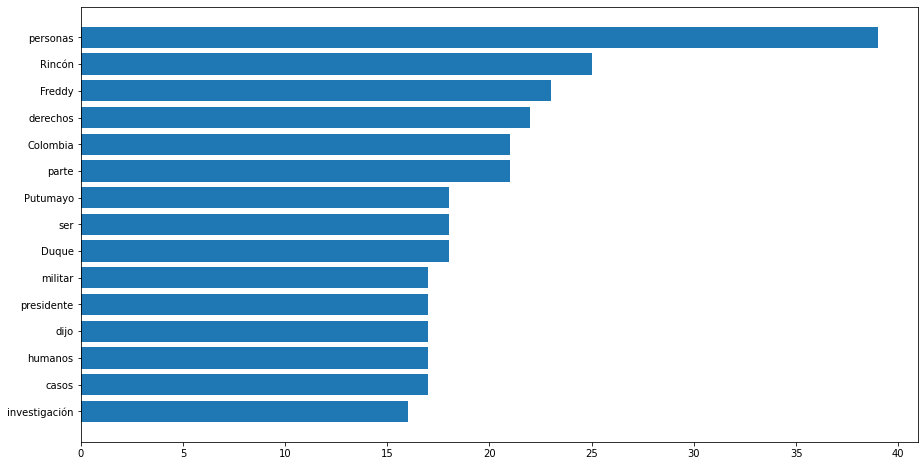

In [21]:
# Plotting a bar char for frecuencies
n = 15

plt.figure(figsize = (15, 8))
plt.barh([ w[0] for w in frec_dist_filtered.most_common(n) ], [ w[1] for w in frec_dist_filtered.most_common(n) ])
plt.gca().invert_yaxis()

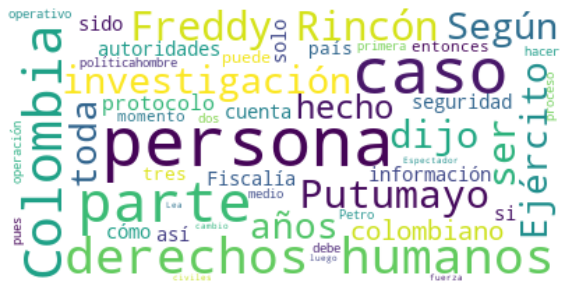

In [22]:
# Creating the wordcloud
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 50, background_color = "white").generate(" ".join(filtered_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [23]:
# Part of Speech (PoS)
# The meaning of each tag can be found here: https://www.guru99.com/pos-tagging-chunking-nltk.html
pos_tags = nltk.pos_tag(filtered_words)

In [24]:
# Sorting tags
pos_tags.sort(key = lambda tup: tup[1])
pos_tags [:10]

[('noviembre', 'CC'),
 ('necesita', 'CC'),
 ('nunca', 'CC'),
 ('zonas', 'CD'),
 ('the', 'DT'),
 ('esposa', 'FW'),
 ('ministro', 'FW'),
 ('parcializado', 'FW'),
 ('esperemos', 'FW'),
 ('esposa', 'FW')]

In [25]:
# Named Entity Recognition (NER)
document = nlp(text)
displacy.render(document, style = "ent")